In [ ]:
# Delhi Air Quality Analysis and Forecasting

#This project explores historical air quality data from Delhi to identify trends, analyze the impact of seasonal changes, and build a predictive model for the Air Quality Index (AQI).

In [ ]:
%pip install statsmodels
%pip install matplotlib
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
import pandas as pd

# Use the full path from the "Location" field in your screenshot
# The r"" makes sure Python reads the path correctly on Windows
df = pd.read_csv(r"C:\Users\anura\Downloads\archive\final_dataset.csv")

print(df.head())

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()


In [ ]:
df.info()


In [ ]:
df['Year'].value_counts()
df['Month'].value_counts()
# This groups all the data by month, then calculates the average AQI for each group.
df.groupby('Month')['AQI'].mean()


In [ ]:
# This groups all the data by month, then calculates the average AQI for each group.
df.groupby('Year')['AQI'].mean()

In [ ]:
import matplotlib.pyplot as plt

# First, store the result of your groupby in a variable
yearly_avg_aqi = df.groupby('Year')['AQI'].mean()

# Now, create a bar chart from it
yearly_avg_aqi.plot(kind='bar', figsize=(10, 6))

plt.title('Average AQI per Year')
plt.ylabel('Mean AQI')
plt.xlabel('Year')
plt.xticks(rotation=0)  # Keeps the year labels horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# Rename the 'Date' column to 'Day' for clarity
df.rename(columns={'Date': 'Day'}, inplace=True)

# Create a new column by combining Year, Month, and Day
df['Full_Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Now, create the line plot
df.plot(x='Full_Date', y='AQI', figsize=(15, 7))

plt.title('Daily AQI Trend (2021-2024)')
plt.ylabel('AQI Value')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 1. Calculate the yearly average AQI
yearly_avg_aqi = df.groupby('Year')['AQI'].mean()

# 2. Create a list of colors based on the condition (AQI > 200)
colors = ['red' if aqi > 200 else 'green' for aqi in yearly_avg_aqi]

# 3. Create the bar chart, passing the custom colors
yearly_avg_aqi.plot(kind='bar', figsize=(10, 6), color=colors)

# --- Add enhancements to the plot ---
plt.title('Average AQI per Year')
plt.ylabel('Mean AQI')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Add a horizontal line at the 200 AQI threshold
plt.axhline(y=200, color='darkred', linestyle='--', label='AQI = 200 (Poor)')
plt.legend() # This displays the label for the horizontal line

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the columns with pollutant data
pollutant_df = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']]

# Calculate the correlation matrix
corr_matrix = pollutant_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only the columns with pollutant data (same as before)
pollutant_df = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']]

# Calculate the correlation matrix (same as before)
corr_matrix = pollutant_df.corr()

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap with the mask applied
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            linewidths=.5) # Adds thin lines between cells

plt.title('Correlation Matrix of Pollutants and AQI (Lower Triangle)')
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px

# --- Data Preparation (Same as before) ---
def get_season(month):
    if month in [4, 5, 6, 7]:
        return 'Summer'
    elif month in [8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    else: # This will only be month 3
        return 'Spring'

df['Season'] = df['Month'].apply(get_season)
seasonal_aqi = df.groupby('Season')['AQI'].mean()
season_order = ['Winter', 'Spring', 'Summer', 'Monsoon', 'Autumn']
seasonal_aqi = seasonal_aqi.reindex(season_order)
seasonal_df = seasonal_aqi.reset_index()

# --- Updated Color Logic ---
# 1. Update the function to include the 'darkred' category
def get_color_category(aqi):
    if aqi > 250:
        return 'Very Poor (>250)'
    elif aqi > 200:
        return 'Poor (201-250)'
    elif aqi > 150:
        return 'Moderate (151-200)'
    else:
        return 'Good (<=150)'

seasonal_df['AQI_Category'] = seasonal_df['AQI'].apply(get_color_category)

# 2. Create the interactive bar chart with the updated color map
fig = px.bar(
    seasonal_df,
    x='Season',
    y='AQI',
    color='AQI_Category',
    color_discrete_map={   # Add the new 'darkred' mapping
        'Very Poor (>250)': 'darkred',
        'Poor (201-250)': 'red',
        'Moderate (151-200)': 'yellow',
        'Good (<=150)': 'green'
    },
    title='Interactive Seasonal Average AQI',
    labels={'AQI': 'Mean AQI Value', 'Season': 'Season'},
    category_orders={'AQI_Category': ['Very Poor (>250)', 'Poor (201-250)', 'Moderate (151-200)', 'Good (<=150)']} # Ensures legend is ordered
)

# Customize the hover text
fig.update_traces(hovertemplate='<b>%{x}</b><br>Average AQI: %{y:.2f}')

# 3. Show the figure
fig.show()

In [ ]:
# Sort the DataFrame by AQI from highest to lowest and get the top 10
worst_days = df.sort_values(by='AQI', ascending=False).head(10)

print("Top 10 Most Polluted Days:")
print(worst_days)

In [ ]:
import matplotlib.pyplot as plt

# 1. Group by 'Season' and calculate the mean for all major pollutants
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
seasonal_pollutant_avg = df.groupby('Season')[pollutant_cols].mean()

print("Average Pollutant Levels by Season:")
print(seasonal_pollutant_avg)

# 2. Visualize the results to easily compare them
# The 'subplots=True' argument creates a separate mini-chart for each pollutant
seasonal_pollutant_avg.plot(
    kind='bar',
    subplots=True,
    figsize=(12, 10),
    layout=(3, 2), # Arrange the charts in a 3x2 grid
    legend=False,
    title='Average Pollutant Levels by Season'
)

# Improve layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
#PREDICTIVE MODELLING USING DATA SCIENCE
# Define our features (the inputs) and the target (the output)
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
target = 'AQI'

X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete!")

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Let's also visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI (Test Set)")
plt.ylabel("Predicted AQI")
plt.title("Actual vs. Predicted AQI")
# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid()
plt.show()

In [28]:
import pandas as pd

# Create a DataFrame to view the coefficients for each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

print("Model Coefficients:")
print(coefficients)

Model Coefficients:
       Coefficient
PM2.5     0.371423
PM10      0.550790
NO2       0.142226
SO2      -0.177631
CO       13.841798
Ozone     0.060985


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Create the Random Forest model instance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model using the same training data
rf_model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the new model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\n--- Random Forest Model Results ---")
print(f"R-squared (R²): {r2_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")


--- Random Forest Model Results ---
R-squared (R²): 0.93
Mean Absolute Error (MAE): 18.61


In [30]:
# Create a dictionary with some example pollutant values for a new day
new_data = {
    'PM2.5': [150.5],
    'PM10': [280.0],
    'NO2': [60.2],
    'SO2': [15.8],
    'CO': [1.5],
    'Ozone': [45.3]
}

# Convert the dictionary into a DataFrame
new_df = pd.DataFrame(new_data)

# Use your trained Random Forest model to predict the AQI
predicted_aqi = rf_model.predict(new_df)

print(f"The model predicts an AQI of: {predicted_aqi[0]:.2f}")

The model predicts an AQI of: 273.83


Feature Importances from Random Forest:
PM10     0.526891
PM2.5    0.422668
NO2      0.014652
CO       0.013549
Ozone    0.012883
SO2      0.009357
dtype: float64


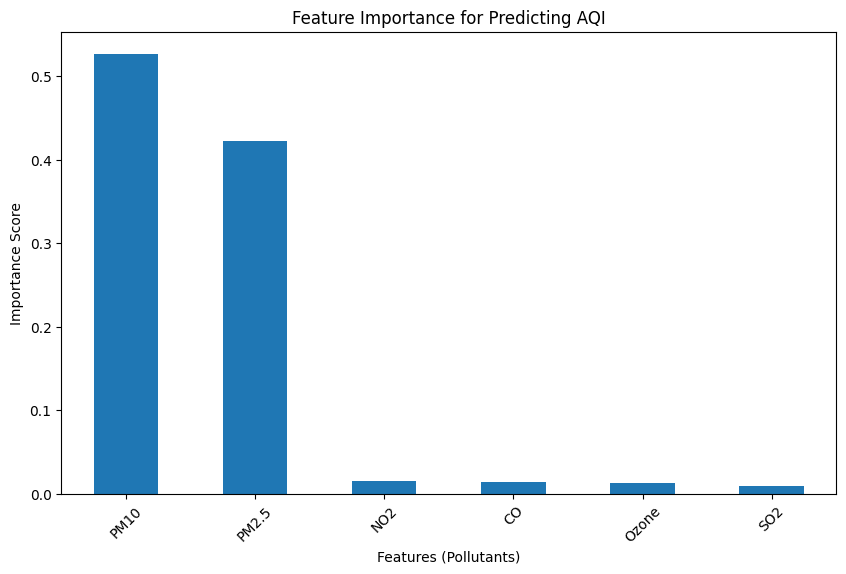

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a pandas Series for easier viewing, sorted by importance
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

print("Feature Importances from Random Forest:")
print(feature_importances)

# Visualize the feature importances for a clear comparison
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance for Predicting AQI')
plt.ylabel('Importance Score')
plt.xlabel('Features (Pollutants)')
plt.xticks(rotation=45)
plt.show()

In [32]:
import joblib

# Define a filename for your model
filename = 'air_quality_model.joblib'

# Save the model to the file
joblib.dump(rf_model, filename)

print(f"Model saved successfully to the file: {filename}")

Model saved successfully to the file: air_quality_model.joblib
